<a href="https://colab.research.google.com/github/Jhaan27/Process_Dig_img/blob/main/Trabalho_2_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import data, color
import numpy as np
import scipy.ndimage as ndimage
import cv2



In [ ]:
def aplicar_contraste_na_matriz(matriz, f1, f2, maior_pixel, k1, k2, k3):
    # Obtém as dimensões da matriz (assumindo que a matriz é uma imagem)
    altura, largura = len(matriz), len(matriz[0])

    # Inicializa uma nova matriz para armazenar os valores contrastados
    matriz_contrastada = [[0] * largura for _ in range(altura)]

    # Aplica o contraste para cada pixel na matriz
    for i in range(altura):
        for j in range(largura):
            pixel = matriz[i][j]
            if pixel >= 0 and pixel < f1:
                matriz_contrastada[i][j] = pixel * k1
            elif pixel >= f1 and pixel <= f2:
                matriz_contrastada[i][j] = pixel * k2
            elif pixel > f2 and pixel <= maior_pixel:
                matriz_contrastada[i][j] = pixel * k3
            else:
                raise ValueError("Valor do pixel fora das faixas especificadas.")

    min_value = np.min(matriz_contrastada)
    max_value = np.max(matriz_contrastada)
    matriz_contrastada = (matriz_contrastada - min_value) * (maior_pixel - 0) / (max_value - min_value) + 0

    return matriz_contrastada

In [ ]:

def aplicar_filtro_gaussiano(imagem, desvio_padrao):
    imagem_filtrada = cv2.GaussianBlur(imagem, (0, 0), desvio_padrao)
    return imagem_filtrada

In [ ]:

def median_noise(image,kernel_size):
    noisy_image = image.copy()
    noisy_image = ndimage.median_filter(noisy_image, size=kernel_size)
    return noisy_image

In [ ]:
def limiarizacao_global(imagem):
    # Verifica se a imagem já está em escala de cinza
    if len(imagem.shape) == 3 and imagem.shape[2] == 3:
        # Converte a imagem para escala de cinza
        imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    else:
        # A imagem já está em escala de cinza
        imagem_cinza = imagem

    # Calcula a média da intensidade de todos os pixels da imagem
    media_intensidade = np.mean(imagem_cinza)

    # Aplica a limiarização com base na média
    _, imagem_binaria = cv2.threshold(imagem_cinza, media_intensidade, 255, cv2.THRESH_BINARY)

    return imagem_binaria


In [ ]:
def limiarizacao_local(imagem, tamanho_regiao):
    # Verifica se a imagem já está em escala de cinza
    if len(imagem.shape) == 3 and imagem.shape[2] == 3:
        # Converte a imagem para escala de cinza
        imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    else:
        # A imagem já está em escala de cinza
        imagem_cinza = imagem

    # Inicializa a imagem binarizada
    imagem_binarizada = np.zeros_like(imagem_cinza)

    # Tamanho da imagem
    altura, largura = imagem_cinza.shape

    for y in range(0, altura, tamanho_regiao):
        for x in range(0, largura, tamanho_regiao):
            # Define a região atual com base no tamanho da região
            regiao = imagem_cinza[y:y+tamanho_regiao, x:x+tamanho_regiao]
            # Calcula a média da intensidade da região
            media_regiao = np.mean(regiao)
            # Aplica a limiarização com base na média da região
            _, regiao_binarizada = cv2.threshold(regiao, media_regiao, 255, cv2.THRESH_BINARY)
            # Copia a região binarizada de volta para a imagem binarizada
            imagem_binarizada[y:y+tamanho_regiao, x:x+tamanho_regiao] = regiao_binarizada

    return imagem_binarizada

In [ ]:
def deteccao_bordas_roberts(imagem_cinza):
    altura, largura = imagem_cinza.shape
    bordas_roberts = np.zeros((altura, largura), dtype=np.uint8)

    for y in range(1, altura - 1):
        for x in range(1, largura - 1):
            gx = imagem_cinza[y, x] - imagem_cinza[y - 1, x - 1]
            gy = imagem_cinza[y - 1, x] - imagem_cinza[y, x - 1]
            magnitude = np.sqrt(gx**2 + gy**2)
            bordas_roberts[y, x] = np.uint8(magnitude)

    return bordas_roberts

In [ ]:
def deteccao_bordas_prewitt(imagem_cinza):
    altura, largura = imagem_cinza.shape
    bordas_prewitt = np.zeros((altura, largura), dtype=np.uint8)

    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    gradiente_x = cv2.filter2D(imagem_cinza, -1, kernel_x)
    gradiente_y = cv2.filter2D(imagem_cinza, -1, kernel_y)

    bordas_prewitt = cv2.addWeighted(gradiente_x, 0.5, gradiente_y, 0.5, 0)

    return bordas_prewitt

In [ ]:

def plotar_imagens_com_titulos(imagens, titulos):
    if len(imagens) != 6:
        print("Erro: Forneça exatamente 6 imagens para plotagem.")
        return

    fig = plt.figure(figsize=(12, 8))

    for i in range(6):
        ax = fig.add_subplot(2, 3, i + 1)
        ax.imshow(imagens[i], cmap='gray')
        ax.set_title(titulos[i])
        ax.axis('off')

    plt.show()

In [ ]:
# Carrega a imagem (substitua pela sua própria imagem)
image = data.coins()  # Exemplo: utilizando uma imagem de moedas do scikit-image
matriz_imagem = image.copy()

In [ ]:
f1 = 40
f2 = 120
k1 = 0.5
k2 = 1.2
k3 = 2

In [ ]:
#_______________1________________________

maior_pixel = np.max(matriz_imagem)  # Valor máximo do pixel na imagem
newimage1 = aplicar_contraste_na_matriz(matriz_imagem, f1, f2, maior_pixel, k1, k2, k3)
contrastada=newimage1
newimage1=np.array(newimage1)
newimage1 = aplicar_filtro_gaussiano(newimage1, 1.6)
newimage1=limiarizacao_global(newimage1)
newimage1=deteccao_bordas_roberts(newimage1)
#____________2________________________

maior_pixel = np.max(matriz_imagem)  # Valor máximo do pixel na imagem
newimage2 = aplicar_contraste_na_matriz(matriz_imagem, f1, f2, maior_pixel, k1, k2, k3)
newimage2=np.array(newimage2)
newimage2 = median_noise(newimage2, 3)
newimagex=limiarizacao_global(newimage2)
newimage2=deteccao_bordas_prewitt(newimagex)

#_______________3________________________

maior_pixel = np.max(matriz_imagem)  # Valor máximo do pixel na imagem
newimage3 = aplicar_contraste_na_matriz(matriz_imagem, f1, f2, maior_pixel, k1, k2, k3)
newimage3=np.array(newimage3)
newimage3 = aplicar_filtro_gaussiano(newimage3, 1.57)
newimage3=limiarizacao_local(newimage3,97)
newimage3=deteccao_bordas_roberts(newimage3)
#____________4________________________

maior_pixel = np.max(matriz_imagem)  # Valor máximo do pixel na imagem
newimage4 = aplicar_contraste_na_matriz(matriz_imagem, f1, f2, maior_pixel, k1, k2, k3)
newimage4=np.array(newimage4)
newimage4 = median_noise(newimage4, 7)
newimage4=limiarizacao_local(newimage4,126)
newimage4=deteccao_bordas_prewitt(newimage4)


In [ ]:

maior_pixel = np.max(matriz_imagem)  # Valor máximo do pixel na imagem
newimage3 = aplicar_contraste_na_matriz(matriz_imagem, f1, f2, maior_pixel, k1, k2, k3)
newimage3=np.array(newimage2)
newimage3 = aplicar_filtro_gaussiano(newimage3, 1.57)
newimage3=limiarizacao_local(newimage3,97)
newimage3=deteccao_bordas_roberts(newimage3)

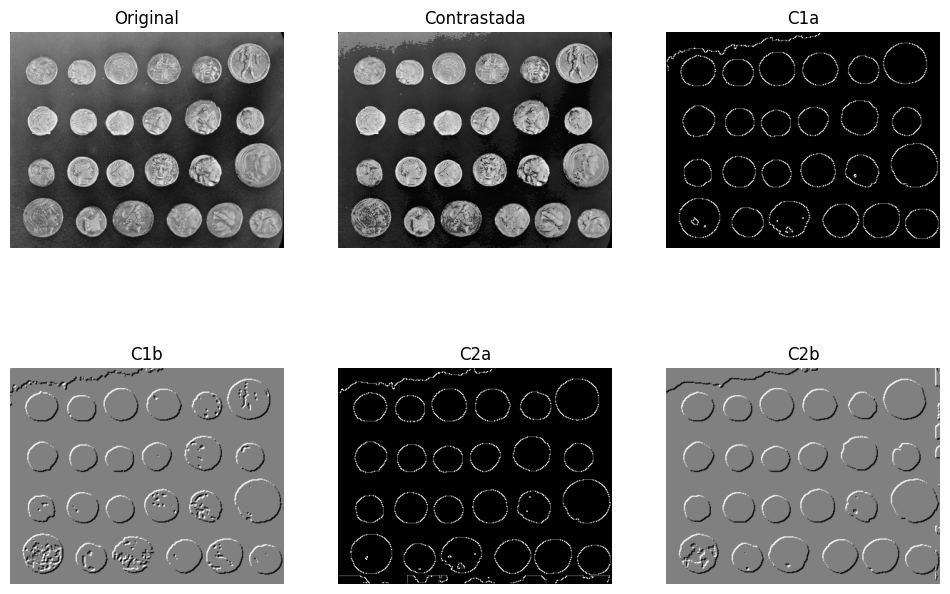

In [ ]:

titulos = ['Original', 'Contrastada', 'C1a', 'C1b', 'C2a', 'C2b']
imagens = [matriz_imagem, contrastada, newimage1, newimage2, newimage3, newimage4]
plotar_imagens_com_titulos(imagens, titulos)
